In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import seed
import tensorflow as tf
tf.random.set_seed(seed)

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json



```
# This is formatted as code
```

#DATA-PREPROCESSING

In [ ]:
data_dir = '/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/2nd_test/'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

In [ ]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/merged_dataset_BearingTest_2.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [2]:
df=pd.read_csv("/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/merged_dataset_BearingTest_2.csv")
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
1,2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
3,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
4,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [3]:

print(df.columns)
print(df.head)
df = df.set_index(df.columns[0])
print(df.head)
print(df.columns)

Index(['Unnamed: 0', 'Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4'], dtype='object')
<bound method NDFrame.head of               Unnamed: 0  Bearing 1  Bearing 2  Bearing 3  Bearing 4
0    2004-02-12 10:32:39   0.058333   0.071832   0.083242   0.043067
1    2004-02-12 10:42:39   0.058995   0.074006   0.084435   0.044541
2    2004-02-12 10:52:39   0.060236   0.074227   0.083926   0.044443
3    2004-02-12 11:02:39   0.061455   0.073844   0.084457   0.045081
4    2004-02-12 11:12:39   0.061361   0.075609   0.082837   0.045118
..                   ...        ...        ...        ...        ...
979  2004-02-19 05:42:39   0.453335   0.161016   0.137440   0.119047
980  2004-02-19 05:52:39   0.337583   0.132400   0.144992   0.092125
981  2004-02-19 06:02:39   0.351111   0.152266   0.151299   0.100817
982  2004-02-19 06:12:39   0.001857   0.003732   0.003656   0.001786
983  2004-02-19 06:22:39   0.001168   0.000767   0.000716   0.001699

[984 rows x 5 columns]>
<bound method NDFrame.head 

In [ ]:
df.shape

(984, 4)

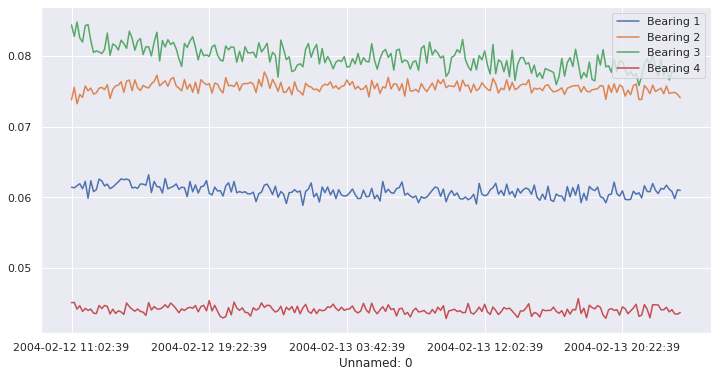

In [4]:
dataset_train = df['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = df['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (12,6))

In [ ]:
# dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
# dataset_test = merged_data['2004-02-13 23:52:39':]
# dataset_train.plot(figsize = (12,6))

In [5]:
print(len(dataset_train))
print(len(dataset_test))

222
760


In [30]:
scaler = preprocessing.MinMaxScaler()
X_test = pd.DataFrame(scaler.fit_transform(df), 
                             columns=df.columns, 
                             index=df.index)

MinMaxScaler” simply re-scales the data to be in the range [0,1]

In [6]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [7]:
print(X_test)

                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
Unnamed: 0                                                     
2004-02-13 23:52:39   0.489779   0.187746   0.255713   0.298511
2004-02-14 00:02:39   0.354621   0.227843   0.244457   0.425398
2004-02-14 00:12:39   0.249681   0.309895   0.231099   0.254432
2004-02-14 00:22:39   0.303792   0.376130   0.195196   0.608553
2004-02-14 00:32:39   0.610786   0.502812   0.162301   0.380454
...                        ...        ...        ...        ...
2004-02-19 05:42:39  91.082874  19.398445   6.833266  27.019529
2004-02-19 05:52:39  64.354599  13.071395   7.671414  17.473961
2004-02-19 06:02:39  67.478515  17.463806   8.371387  20.556042
2004-02-19 06:12:39 -13.167157 -15.376561  -8.014253 -14.555904
2004-02-19 06:22:39 -13.326128 -16.031989  -8.340514 -14.586894

[760 rows x 4 columns]


# PCA TYPE MODEL

PCA type model for anomaly detection.compressing the sensor readings down to the two main principal components

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [31]:
X_test_PCA = pca.fit_transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In order to use the Mahalanobis distance to classify a test point belonging to one of N classes,  first estimate the covariance matrix of each class, based on samples belonging to each class. here, we are only interested in classifying “normal” vs “anomaly”, we use training data that only contains normal operating conditions to calculate the covariance matrix. Then, given a test sample, we compute the Mahalanobis distance to the “normal” class, and classifies the test point as an “anomaly” if the distance is above a certain threshold

In [17]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [10]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [11]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

Calculate threshold value for classifying datapoint as anomaly:

In [12]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [13]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [32]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

Calculate the covariance matrix and its inverse, based on data in the training set:


In [18]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [22]:
np.save('/content/drive/MyDrive/vibration_data/pdm/cov_matrix.npy', cov_matrix)  

In [23]:
np.save('/content/drive/MyDrive/vibration_data/pdm/inv_cov_matrix.npy', inv_cov_matrix)  

In [19]:
cov_matrix.shape

(2, 2)

In [21]:
cov_matrix

array([[6.83095186e-02, 3.06859823e-18],
       [3.06859823e-18, 2.73966938e-02]])

In [20]:
inv_cov_matrix.shape

(2, 2)

calculate the mean value for the input variables in the training set,  later used to calculate the Mahalanobis distance to datapoints in the test set

In [24]:
mean_distr = data_train.mean(axis=0)

In [25]:
print(mean_distr)

[-1.60032148e-17  2.40048222e-17]


In [29]:
np.save('/content/drive/MyDrive/vibration_data/pdm/mean_distr.npy', mean_distr)  

In [28]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

In [33]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)

In [27]:
threshold

3.8120454918056756

The square of the Mahalanobis distance to the centroid of the distribution should follow a χ2 distribution if the assumption of normal distributed input variables is fulfilled. This is also the assumption behind the above calculation of the threshold value for detecting an anomaly.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 15.0)

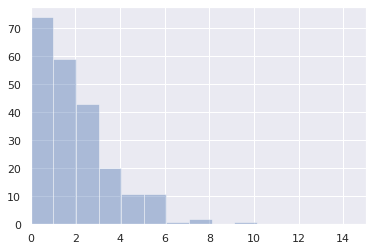

In [ ]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

visualizing the Mahalanobis distance

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mahalanobis dist')

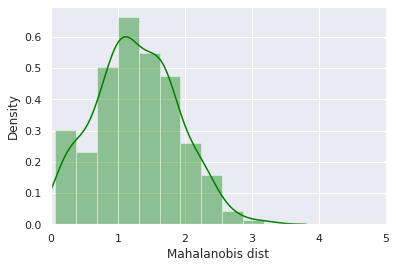

In [ ]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [ ]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2004-02-13 23:52:39,1.032676,3.812045,False
2004-02-14 00:02:39,1.148163,3.812045,False
2004-02-14 00:12:39,1.509998,3.812045,False
2004-02-14 00:22:39,1.849725,3.812045,False
2004-02-14 00:32:39,0.701075,3.812045,False


In [34]:
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
Unnamed: 0,,,
2004-02-12 10:32:39,0.318223,3.812045,False
2004-02-12 10:42:39,0.305161,3.812045,False
2004-02-12 10:52:39,0.286975,3.812045,False
2004-02-12 11:02:39,0.272108,3.812045,False
2004-02-12 11:12:39,0.253647,3.812045,False


In [ ]:
anomaly_alldata['timestamp']=anomaly_alldata.index

In [ ]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
#anomaly_alldata.to_csv('/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/Anomaly_distance.csv')


In [ ]:
print(anomaly_alldata.columns)
m,n=anomaly_alldata.shape
anomaly_alldata

Index(['Mob dist', 'Thresh', 'Anomaly'], dtype='object')


,Mob dist,Thresh,Anomaly
2004-02-12 11:02:39,1.667002,3.812045,False
2004-02-12 11:12:39,1.699415,3.812045,False
2004-02-12 11:22:39,2.671968,3.812045,False
2004-02-12 11:32:39,1.424617,3.812045,False
2004-02-12 11:42:39,1.624601,3.812045,False
...,...,...,...
2004-02-19 05:42:39,295.672654,3.812045,True
2004-02-19 05:52:39,208.319859,3.812045,True
2004-02-19 06:02:39,229.263413,3.812045,True
2004-02-19 06:12:39,105.693490,3.812045,True


In [ ]:
anomaly_alldata.reset_index(drop=True, inplace=True)

In [ ]:
anomaly_alldata

In [ ]:
df = pd.DataFrame.from_dict(anomaly_alldata)

stored this data in a csv file

In [ ]:
df.to_csv("/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/data.csv")

# Second Stage data(Anomaly all data)

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/vibration_data/pdm/nasa_data/2nd_test/data.csv")

In [ ]:
data.columns

Index(['Unnamed: 0', 'Mob dist', 'Thresh', 'Anomaly', 'timestamp'], dtype='object')

In [ ]:
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [ ]:
data

,Mob dist,Thresh,Anomaly,timestamp
0,1.667002,3.812045,False,2004-02-12 11:02:39
1,1.699415,3.812045,False,2004-02-12 11:12:39
2,2.671968,3.812045,False,2004-02-12 11:22:39
3,1.424617,3.812045,False,2004-02-12 11:32:39
4,1.624601,3.812045,False,2004-02-12 11:42:39
...,...,...,...,...
977,295.672654,3.812045,True,2004-02-19 05:42:39
978,208.319859,3.812045,True,2004-02-19 05:52:39
979,229.263413,3.812045,True,2004-02-19 06:02:39
980,105.693490,3.812045,True,2004-02-19 06:12:39


In [ ]:
data.dtypes

Mob dist            float64
Thresh              float64
Anomaly                bool
timestamp    datetime64[ns]
dtype: object

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

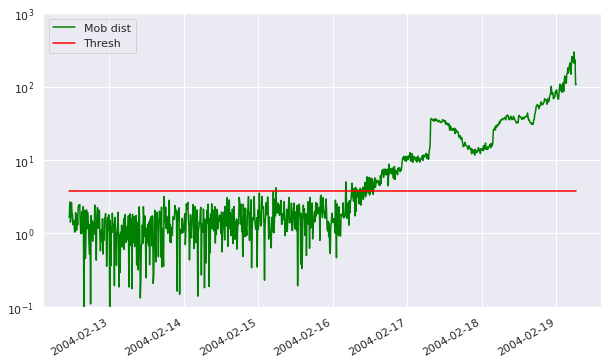

In [ ]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

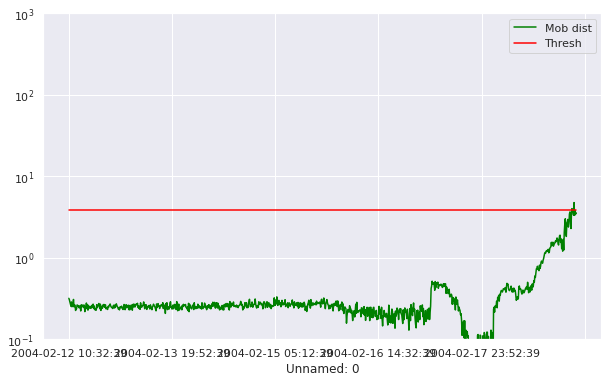

In [35]:
anomaly.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [ ]:
data.dtypes

Mob dist     float64
Thresh       float64
Anomaly         bool
timestamp     object
dtype: object

In [ ]:
import tensorflow
tensorflow.random.set_seed(10)
from keras.models import model_from_json

# AUTOENCODER MODEL

In [ ]:
seed(10)
#set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [ ]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.1806 - val_loss: 0.0879
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1220 - val_loss: 0.0590
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0836 - val_loss: 0.0365
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0248
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0212
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0204 - val_loss: 0.0221
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0233
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0222
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0218
Epoch 10/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0164 - val_loss: 0.0208
Epoch 11

In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/vibration_data/pdm/aotoencoder_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/vibration_data/pdm/autoencoder_model_weights.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('/content/drive/MyDrive/vibration_data/pdm/aotoencoder_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/vibration_data/pdm/autoencoder_model_weights.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
model.save("/content/drive/MyDrive/vibration_data/pdm/saved_model.h5")

In [ ]:
model= load_model("/content/drive/MyDrive/vibration_data/pdm/saved_model.h5")

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

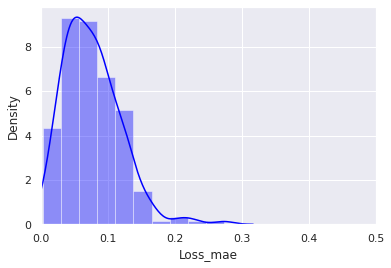

In [ ]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
Unnamed: 0                                                     
2004-02-12 10:32:39   0.345996   0.423736   0.359775   0.302071
2004-02-12 10:42:39   0.352732   0.432512   0.363124   0.316312
2004-02-12 10:52:39   0.352378   0.432807   0.362521   0.316922
2004-02-12 11:02:39   0.355564   0.434662   0.365402   0.319538
2004-02-12 11:12:39   0.351437   0.437704   0.358599   0.325948
...                        ...        ...        ...        ...
2004-02-19 05:42:39   1.041754   0.924274   0.936191   1.051719
2004-02-19 05:52:39   0.903256   0.755853   0.859409   0.774179
2004-02-19 06:02:39   0.963422   0.822223   0.896365   0.881258
2004-02-19 06:12:39   0.004458   0.165830   0.084241  -0.080207
2004-02-19 06:22:39  -0.003822   0.161535   0.076387  -0.085780

[984 rows x 4 columns]
                     Bearing 1  Bearing 2  Bearing 3  Bearing 4
Unnamed: 0                                                     
2004-02-12 10:32

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Loss_mae,Threshold,Anomaly
Unnamed: 0,,,


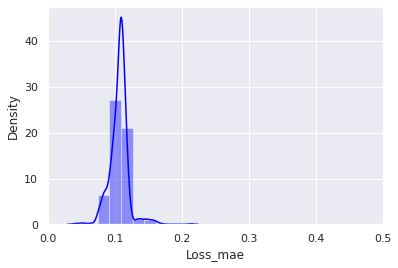

In [ ]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index
print(X_pred)
print(X_test)
scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])
scored['Threshold'] = 0.3
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
print(scored['Anomaly'])

scored[scored['Anomaly']]

In [ ]:
scored.to_csv("/content/drive/MyDrive/vibration_data/pdm/autoen_data.csv")

In [ ]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

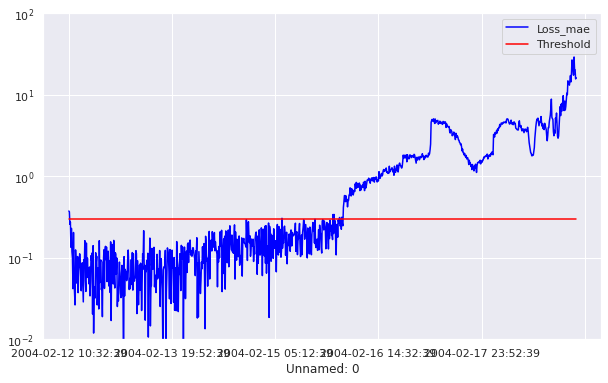

In [ ]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])